#<h1>Linear Regression<h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, f, norm, chi2

import seaborn as sns
from IPython.display import display_html 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px

In [2]:
df=pd.read_csv('adult.csv')

<div dir="rtl">
בחרנו בשלושת המשתנים המסבירים הבאים: גיל (age), מספר השכלה  (educational-num) מתאר את רמת ההשכלה של אדם בסט הנתונים בין 1-16 ורווחי הון (capital-gain).
עבור המשתנה המוסבר בחרנו במספר שעות העבודה השבועיות(hours-per-week) .

</div>

##1.


<div dir="rtl">

שאלת המחקר שלנו האם יש קשר בין הגיל של אדם, רמת השכלתו ומצבו ורווחי ההון שלו למספר שעות העבודה השבועיות שלו.

</div>

##2.

In [3]:
sample = df.sample(n=200, random_state=42)

<div dir="rtl">
<h3>
עבור המשתנים המסבירים:
<h3>
</div>

##3.a

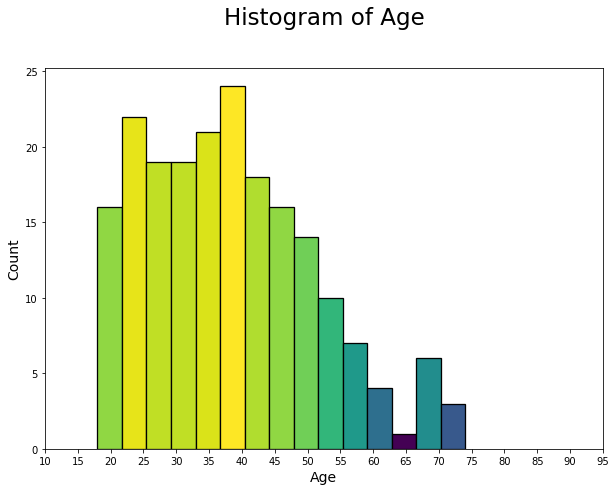

In [4]:
#3.a
fig, ax = plt.subplots(figsize =(10,7))
N, bins, patches = ax.hist(sample["age"], bins = 15 , edgecolor='black', linewidth=1.3)
plt.title("Histogram of Age",\
          fontdict={'fontsize': 23}, y = 1.1)
plt.xlabel("Age", fontdict={'fontsize': 14})
plt.ylabel("Count", fontdict={'fontsize': 14})
plt.xticks(np.arange(10,100,step=5))
fracs = ((N**(1 / 5)) / N.max())
norm = plt.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
plt.show()

In [5]:
#style
style = [{'selector': 'caption','props': [('background', '#ffdf80'),\
('color', 'Black'),('font-family', 'verdana'), ("font-size", "150%")]},
 {'selector': 'th','props': [('background', '#3399ff'), ('color', 'Black'),\
                             ('font-family', 'verdana'), ("font-size", "130%")]},
 {'selector': 'td','props': [('color', 'BLACK'),('font-family', 'verdana'), ("font-size", "130%")]},
 {'selector': 'tr:nth-of-type(odd)','props': [('background', 'WHITE')]}, 
 {'selector': 'tr:nth-of-type(even)','props': [('background', 'WHITE')]},
 {'selector': 'tr:hover','props': [('background-color', '#80bfff')]}]


In [6]:


education_levels, counts = np.unique(sample['educational-num'], return_counts=True)
levels=[]
amount=[]
for level, count in zip(education_levels, counts):
    levels.append(level)
    amount.append(count)
table = pd.DataFrame({'educational-num': levels, 'Count': amount}).style.format(precision= 2).set_table_attributes("style='display:inline'").\
set_caption('Table for educational-num').set_table_styles(style)
display_html(table._repr_html_(), raw=True)


,educational-num,Count
0,1,1
1,3,5
2,4,6
3,5,2
4,6,6
5,7,7
6,8,3
7,9,70
8,10,39
9,11,8


In [7]:
family_status, counts = np.unique(sample['gender'], return_counts=True)
relationships=[]
amount=[]
for relationship, count in zip(family_status, counts):
    relationships.append(relationship)
    amount.append(count)
table = pd.DataFrame({'relationship': relationships, 'Count': amount}).style.format(precision= 2).set_table_attributes("style='display:inline'").\
set_caption('Table for relationship').set_table_styles(style)
display_html(table._repr_html_(), raw=True)


,relationship,Count
0,Female,61
1,Male,139


<div dir="rtl">
<h3>
עבור המשתנה המוסבר:
<h3>
</div>

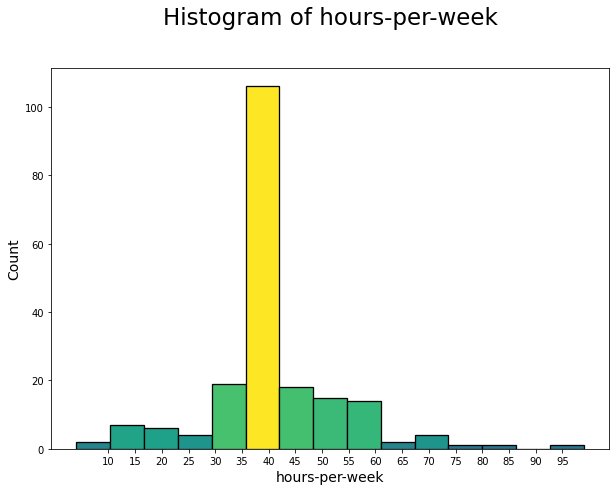

In [8]:
 
fig, ax = plt.subplots(figsize =(10,7))
N, bins, patches = ax.hist(sample["hours-per-week"], bins = 15 , edgecolor='black', linewidth=1.3)
plt.title("Histogram of hours-per-week",\
          fontdict={'fontsize': 23}, y = 1.1)
plt.xlabel("hours-per-week", fontdict={'fontsize': 14})
plt.ylabel("Count", fontdict={'fontsize': 14})
plt.xticks(np.arange(10,100,step=5))
fracs = ((N**(1 / 5)) / N.max())
norm = plt.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.show()

##3.b 


<div dir="rtl">
מבחינת נתונים חסרים - אין, במשתנה capital-gain 92% מהערכים הם 0, אך זה לא משהו חריג כי הרוב פשוט ללא רווח צדדי, במשתנה המוסבר - מספר שעות העבודה השבועיות הרוב המוחלט הינו באזור של הערך 40. התפלגויות כל המשתנים הללו אינה נראית סימטרית לפי ההיסטוגרמות ואפילו אפשר לומר שההתפלגות של המשתנה גיל הינו התפלגות א-סימטרית עם זנב ימני.
</div>

##3.c

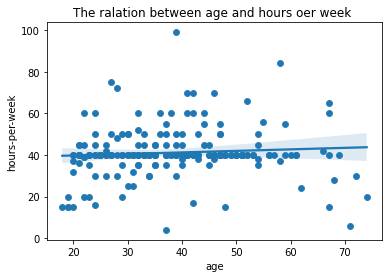

In [9]:
# 3.c

sns.scatterplot(data=sample,x="age", y="hours-per-week" )
sns.regplot(x=sample['age'], y=sample['hours-per-week'])

plt.title("The ralation between age and hours oer week ")
plt.xlabel=("age")
plt.ylabel=("hours per week")


<div dir="rtl">
יש קשר לינארי עולה בין הגיל למספר שעות העבודה השבועיות.</br>
נשים לב שככל שהגיל עולה כך גם מספר שעות העבודה השבועיות עולה אך עדיין רוב התצפיות הם באזור של 40 שעות עבודה שבועויות ולכן העלייה מזערית.
</div>

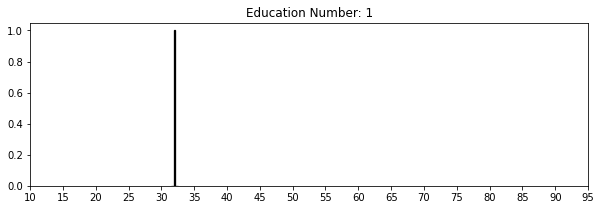

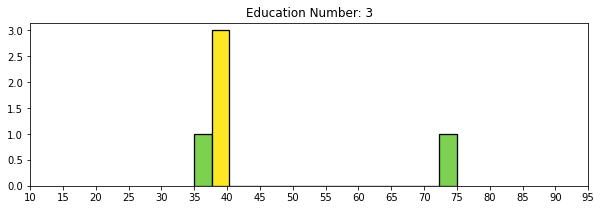

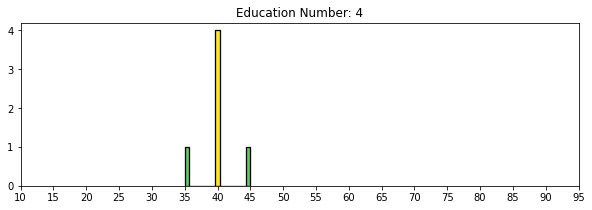

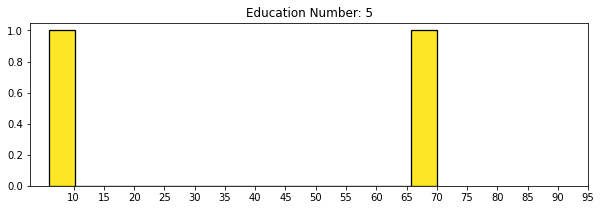

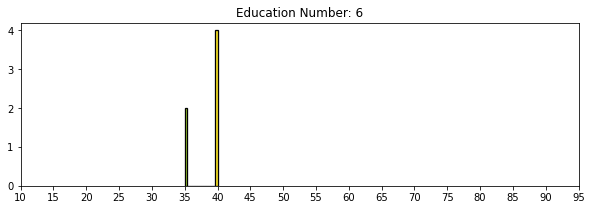

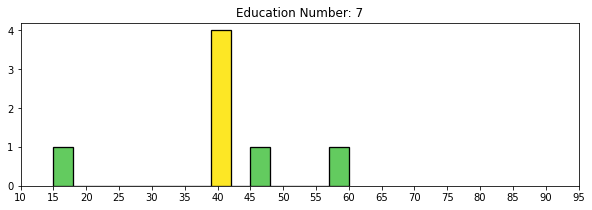

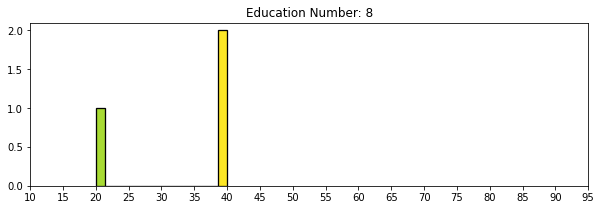

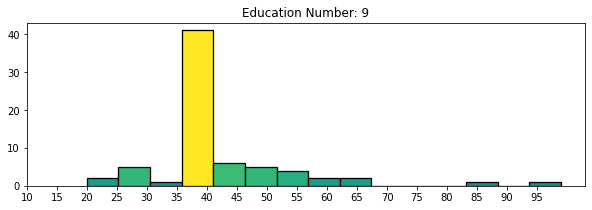

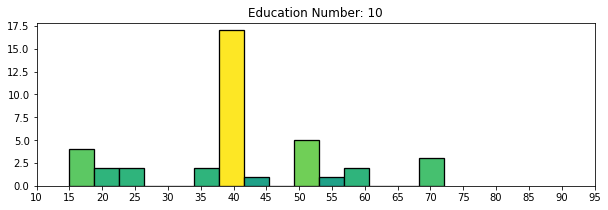

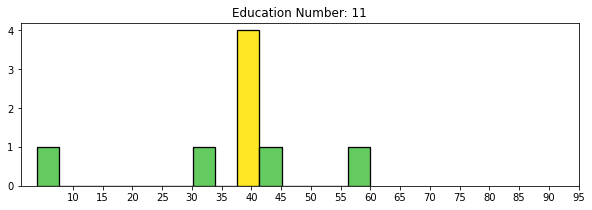

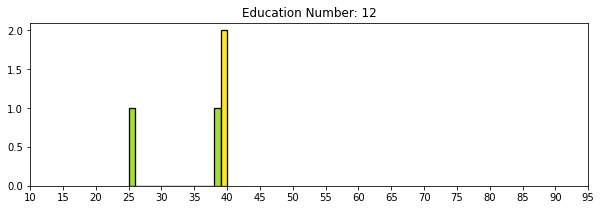

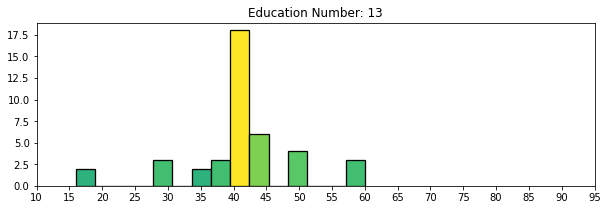

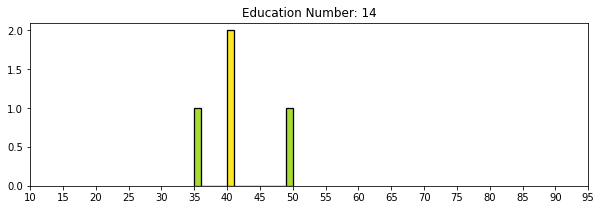

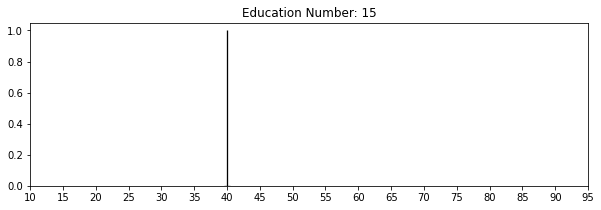

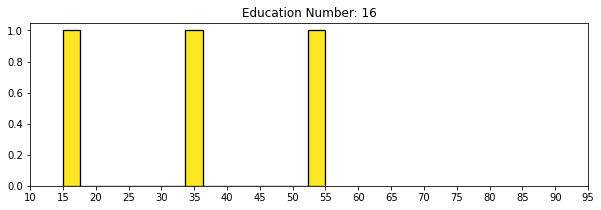

In [10]:

# histogram

grouped_data = sample.groupby('educational-num')

for name, group in grouped_data:
    fig, ax = plt.subplots(figsize =(10,3))
    N, bins, patches = ax.hist(group["hours-per-week"], bins = 15 , edgecolor='black', linewidth=1.3)
    # plt.xlabel("hours-per-week", fontdict={'fontsize': 14})
    # plt.ylabel("Count", fontdict={'fontsize': 14})
    plt.xticks(np.arange(10,100,step=5))
    fracs = ((N**(1 /5)) / N.max())
    norm = plt.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)
    plt.title('Education Number: {}'.format(name))
    plt.show()






<div dir="rtl"> 
ניתן לשים לב שבמדגם של ה100 אנשים שלקחנו מהדאטא יש גיוון של אנשים מבחינת educational-num ובכך גם מספר שעות העבודה השבועיות שלהם, ניתן לשים לב שהרבה מהאנשים עם educational-num 9, 10 ו13 ולכן בהם קיבלנו היסטוגרמות שנראים עם התפלגות כלשהי.
</div>

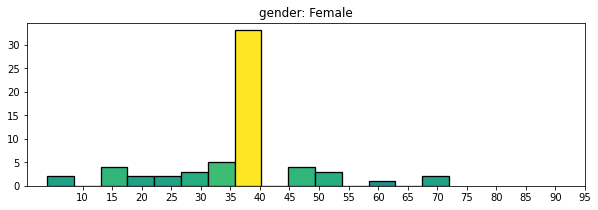

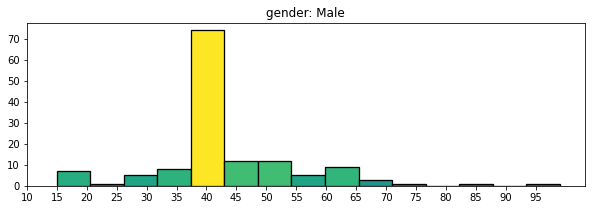

In [11]:
grouped_data = sample.groupby('gender')
# grouped_data
# # create a histogram for each group

for name, group in grouped_data:
    fig, ax = plt.subplots(figsize =(10,3))
    N, bins, patches = ax.hist(group["hours-per-week"], bins = 15 , edgecolor='black', linewidth=1.3)
    # plt.xlabel("hours-per-week", fontdict={'fontsize': 14})
    # plt.ylabel("Count", fontdict={'fontsize': 14})
    plt.xticks(np.arange(10,100,step=5))
    fracs = ((N**(1 /5)) / N.max())
    norm = plt.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)
    plt.title('gender: {}'.format(name))
    plt.show()






##4.

In [12]:
# 4.
sample_test=sample
sample_test['x0'] = 1
X = sample_test[['x0','age', 'educational-num', 'capital-gain']].to_numpy()
y = sample_test['hours-per-week'].to_numpy()

beta_cova_1 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) 
print('beta_cova: ', beta_cova_1)

beta_cova:  [ 3.99570430e+01  7.32683398e-02 -1.66804698e-01  2.31080424e-06]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# ///////////////////////////////////////////////////// change////////////////////////////////////////////////////////////////////////////////////////////
# Split the data into training and test sets
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(sample[['x0','age','educational-num','capital-gain']], 
                                                    sample['hours-per-week'], test_size=0.2)
model.fit(X_train, y_train)
coef = model.coef_
coef

array([ 0.00000000e+00,  8.64515348e-02, -1.35968718e-01, -1.40734645e-05])

<div dir="rtl">
מדובר ברגרסיה לינארית ולכן עלייה ביחידה אחת של המשתנה המסביר תגדיל בbeta.i את המשתנה המוסבר
</div>

##5.

In [14]:
from scipy.stats import f, norm
P = np.dot(np.dot(X, np.linalg.inv(np.dot(X.T, X))), X.T)
n = np.shape(X)[0]
p = np.shape(beta_cova_1)[0]
SS_r = np.dot(np.dot(y.T ,(P - (1/n) * np.ones(np.shape(P)))), y)
SS_res = np.dot(np.dot(y.T ,(np.identity(n) - P)), y)
SS_t = SS_r + SS_res
MSR = SS_r / (p-1)
MSE = SS_res / (n-p)
MST = SS_t / (n-1)
F = (SS_r / (p-1)) / (SS_res / (n-p))
p_value = 1 - f.cdf(F, p-1, n-p)
R_2 = SS_r / SS_t
R_adj = 1 - ((SS_res/(n-p))/ (SS_t/ (n-1)))

print('SS_r:', SS_r)
print('SS_res:', SS_res)
print('SS_t:', SS_t)
print('MSR:', MSR)
print('MSE:', MSE)
print('MST:', MST)
print('F:', F)
print('p value:', p_value)
print('R^2:', R_2)
print('R_adj:', R_adj)

SS_r: 217.46776710431521
SS_res: 29230.40723289567
SS_t: 29447.874999999985
MSR: 72.48925570143841
MSE: 149.13473078007996
MST: 147.97927135678384
F: 0.48606555510087024
p value: 0.6923470201060435
R^2: 0.007384837347493336
R_adj: -0.007808251876779915


In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
X =sample_test[['age', 'educational-num', 'capital-gain']].to_numpy()

# Perform an ANOVA test
model = ols('y ~ X', data=sample).fit()

# Print the ANOVA table
table = sm.stats.anova_lm(model, typ=2)
print(table)


                sum_sq     df         F    PR(>F)
X           217.467767    3.0  0.486066  0.692347
Residual  29230.407233  196.0       NaN       NaN


##6.

In [16]:
conf_int = model.conf_int()
print(conf_int)


                   0          1
Intercept  31.712431  48.201655
X[0]       -0.059041   0.205578
X[1]       -0.807274   0.473665
X[2]       -0.000227   0.000232


In [17]:
df_test=df
df_test['x0'] = 1
X = df_test[['x0','age', 'educational-num', 'capital-gain']].to_numpy()
y = df_test['hours-per-week'].to_numpy()

beta_cova_2 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) 
print('beta_cova: ', beta_cova_2)

beta_cova:  [3.16054477e+01 5.66975263e-02 6.46684694e-01 1.00636294e-04]


##7.

<div dir="rtl">
נשתמש במבחן F - ככל שהיחס בין השונות שהמודל הצליח להסביר לשונות שהמודל לא הצליח להסביר גדול יותר כך הרגרסיה מובהקת יותר ולכן המודל מתאר יותר טוב את הנתונים.
</div>

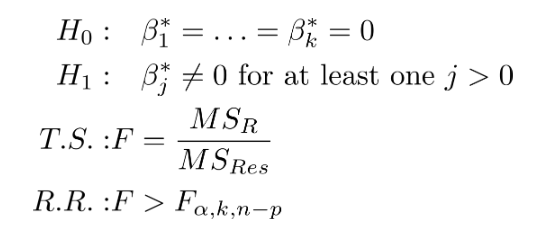

In [18]:
print("F is ", F)

if F <= f.ppf(0.95, p-1, n-p):
    print("Accept H0")
else:
    print("Reject H0")

F is  0.48606555510087024
Accept H0


##8.


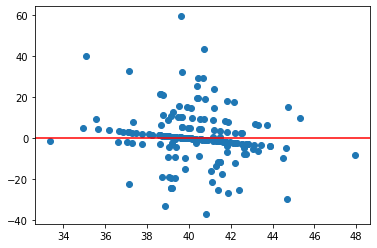

In [19]:
X = sample[['x0','age', 'educational-num', 'capital-gain']].to_numpy()
y=sample["hours-per-week"]
y_cova = np.dot(beta_cova_2, X.T)
plt.scatter(y_cova, y - y_cova)
plt.axhline(y = 0, color = 'r', linestyle = '-')
# plt.xlabel('y_cova')
# plt.ylabel('y - y_cova')
# plt.title('Analysis of residuals')

<div dir="rtl">
מבחינת עובי האלומה שאינו קבוע נסיק כי הנחת השונות קבועה הייתה הנחה  שאינה סבירה.
עצם העובדה שהמודל אינו סימטרי סביב ציר X נסיק כי קיימת הטיה של המודל בין אן הפרטמטרים שגויים או בשל מודל לא מתאים. כלומר  הקשר הוא אינו לינארי 
</div>

##9.a,b,c

In [20]:
df2 = df.merge(sample, how="outer", indicator=True)
df3 = df2[df2['_merge'] == "left_only"]
df4=df3.sample(n=1000, random_state=42) 
X=df4[['x0','age', 'educational-num', 'capital-gain']]
y=df4["hours-per-week"]
n = np.shape(X)[0]
p = np.shape(beta_cova_2)[0]
var_cova = (1/(n-p)) * sum((y - np.dot(X, beta_cova_2)) ** 2)
C = np.linalg.inv(np.dot(X.T, X))
counter=0;
CI=[]
y_predictions=[]
for i in range(df4.shape[0]):
  x_new =  X.iloc[i]
  y_pred= np.dot(beta_cova_2, x_new) 
  y_predictions.append(y_pred)
  b = y_pred + norm.ppf(0.975) * np.sqrt(var_cova * np.dot(np.dot(x_new, C), x_new.T ))
  s = y_pred - norm.ppf(0.975) * np.sqrt(var_cova * np.dot(np.dot(x_new, C), x_new.T))
  CI.append((s,b))
  # print(CI[i][0],y_pred,CI[i][1])
  if y_pred>=CI[i][0] and y_pred<=CI[i][1]:
      counter+=1
print((counter/n)*100,'%')

100.0 %


##10.

In [21]:
# X=df4[['x0','age', 'educational-num', 'capital-gain']]
X=sample[['x0','age', 'educational-num', 'capital-gain']]

newModel=sample
newModel['z12']=sample['age'] * sample["educational-num"]
newModel['z13']=sample['age'] * sample["capital-gain"]
newModel['z23']=sample['educational-num'] * sample["capital-gain"]
X_2=newModel[['x0','age', 'educational-num', 'capital-gain','z12','z13','z23']].to_numpy()
y=newModel['hours-per-week']
beta_cova = np.dot(np.dot(np.linalg.inv(np.dot(X_2.T, X_2)), X_2.T), y) 
beta_cova

array([ 5.55537560e+01, -3.05446017e-01, -1.83074572e+00, -9.67994411e-05,
        4.01633552e-02, -5.85830369e-06,  5.16806239e-05])

In [22]:
# liklihood ratio test
from scipy.stats import t, f, norm, chi2

import statsmodels.formula.api as smf
model1 = smf.ols('y ~ X', data=sample).fit()
model2 = smf.ols('y ~ X_2', data=newModel).fit()
likelihood_ratio = model2.llf / model1.llf
dof =6 - 3
critical_value = chi2.ppf(0.95, dof)

if likelihood_ratio > critical_value:
    print("The difference in fit is statistically significant.")
else:
    print("The difference in fit is not statistically significant.")

The difference in fit is not statistically significant.


In [23]:
y_hat = np.dot(X, beta_cova_2.T)
y_hat_interactions = np.dot(X_2, beta_cova.T)
n = X.shape[0]
p = np.shape(beta_cova)[0]
p_interactions = beta_cova.shape[0]
var_hat_full_model = (1/(n-p_interactions)) * sum((y - y_hat_interactions) ** 2)
r_basic = sum((y_hat - y) ** 2) + 2 * (p-1) * var_hat_full_model
print("Mallow for basic model is ", r_basic)

r_interactions = sum((y_hat_interactions - y) ** 2) + 2 * (p_interactions-1) * var_hat_full_model
print("Mallow for interaction model is ", r_interactions)

Mallow for basic model is  32185.96904435868
Mallow for interaction model is  30483.97809616075


In [24]:
aic_basic = ((-n/2) * np.log(2 * np.pi * var_hat_full_model)) - ((1/(2*var_hat_full_model)) * sum((y-y_hat) ** 2)) - (p-1)
print("AIC for basic model is ", aic_basic)

aic_interactions = ((-n/2) * np.log(2 * np.pi * var_hat_full_model)) - ((1/(2*var_hat_full_model)) * sum((y-y_hat_interactions) ** 2)) - (p_interactions-1)
print("AIC for interaction model is ", aic_interactions)

AIC for basic model is  -792.2051722384044
AIC for interaction model is  -786.4823603521087


<div dir="rtl">
במדד של Mallow נרצה להשתמש במודל עם האיטרציות מכיוון שאנחנו רוצים למזער את הציון והוא קיבל ציון נמוך יותר. במדד AIC נרצה להשתמש במודל עם האיטרציות גם מכייון שאנחנו רוצים למקס את הציון והוא קיבל ציון גבוה יותר.
</div>

#<h1>Logistic Regression<h1>

<div dir="rtl">
 בחרנו בשלושת המשתנים המסבירים הבאים: גיל (age), מספר השכלה  (educational-num) מתאר את רמת ההשכלה של אדם בסט הנתונים בין 1-16 ומספר שעות העבודה בשבוע (hours-per-week).
עבור המשתנה המוסבר בחרנו בהכנסה (income).
עשינו טרנספורמציה לנתונים , כעת בעמודת הincome  יהיה 1 : אם אדם מרוויח יותר מ 50k  ו -0 אחרת.

</div>

##1.

<div dir="rtl">
שאלת המחקר היא הים יש קשר בין גיל האדם, רמת השכלתו ומספר שעות עבודה שבועיות להאם הוא ירוויח מעל 50 K  בחודש 
</div>

##2.

In [25]:
# 2.
sample2 = df.sample(n=200, random_state=0)


# sample_transform["income"] = np.where(sample_transform["gender"]==">50K", 1, 0)


##3.

In [26]:
# 0 is for  aperson whoe eran under 50K
# 1 ids for over 50K
over50k, counts = np.unique(sample2['income'], return_counts=True)
incomes=[]
amount=[]
for income, count in zip(over50k, counts):
    incomes.append(income)
    amount.append(count)

table = pd.DataFrame({'income over 50k?': incomes, 'Count': amount}).style.format(precision= 2).set_table_attributes("style='display:inline'").\
set_caption('Table for income').set_table_styles(style)
display_html(table._repr_html_(), raw=True)


,income over 50k?,Count
0,<=50K,138
1,>50K,62


<div dir="rtl"> 
הגרפים הוצגו בחלק 1 ובסעיף הזה הוצג הגרף של המשתנה שלא הופיע בחלק הראשון.
בנוסף אין צורך להציג את ההתפלגויות שוב.
</div>

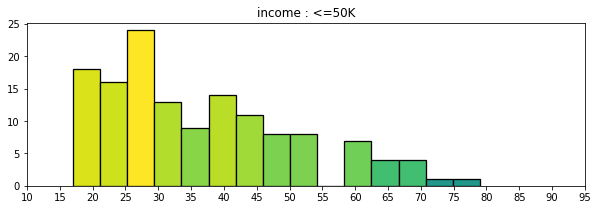

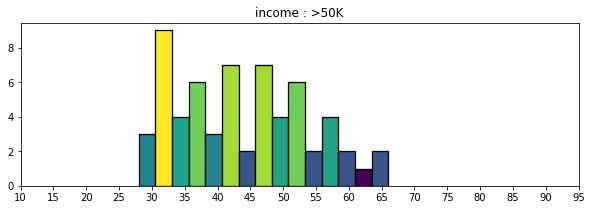

In [27]:
grouped_data = sample2.groupby('income')
# grouped_data
# # create a histogram for each group

for name, group in grouped_data:
    fig, ax = plt.subplots(figsize =(10,3))
    N, bins, patches = ax.hist(group["age"], bins = 15 , edgecolor='black', linewidth=1.3)
    # plt.xlabel("hours-per-week", fontdict={'fontsize': 14})
    # plt.ylabel("Count", fontdict={'fontsize': 14})
    plt.xticks(np.arange(10,100,step=5))
    fracs = ((N**(1 /5)) / N.max())
    norm = plt.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)
    plt.title('income : {}'.format(name))
    plt.show()

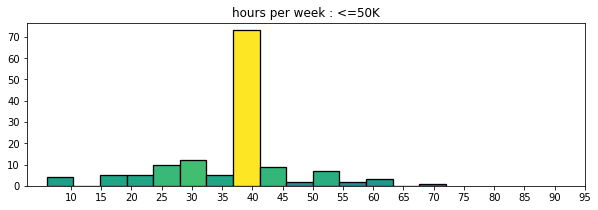

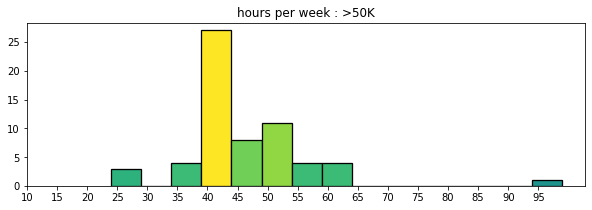

In [28]:
grouped_data = sample2.groupby('income')
# grouped_data
# # create a histogram for each group

for name, group in grouped_data:
    fig, ax = plt.subplots(figsize =(10,3))
    N, bins, patches = ax.hist(group["hours-per-week"], bins = 15 , edgecolor='black', linewidth=1.3)
    # plt.xlabel("hours-per-week", fontdict={'fontsize': 14})
    # plt.ylabel("Count", fontdict={'fontsize': 14})
    plt.xticks(np.arange(10,100,step=5))
    fracs = ((N**(1 /5)) / N.max())
    norm = plt.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)
    plt.title('hours per week : {}'.format(name))
    plt.show()

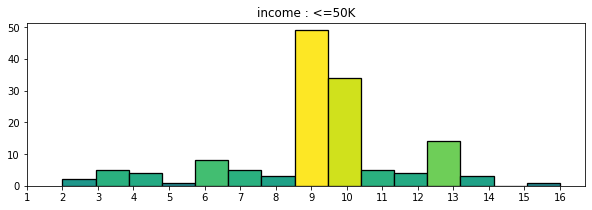

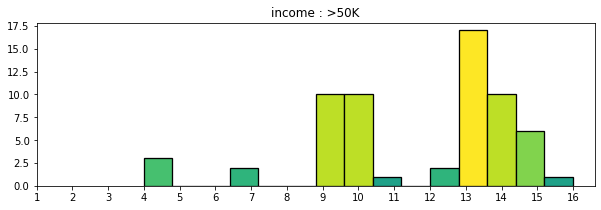

In [29]:
grouped_data = sample2.groupby('income')
# grouped_data
# # create a histogram for each group

for name, group in grouped_data:
    fig, ax = plt.subplots(figsize =(10,3))
    N, bins, patches = ax.hist(group["educational-num"], bins = 15 , edgecolor='black', linewidth=1.3)
    # plt.xlabel("hours-per-week", fontdict={'fontsize': 14})
    # plt.ylabel("Count", fontdict={'fontsize': 14})
    plt.xticks(np.arange(1,17,step=1))
    fracs = ((N**(1 /5)) / N.max())
    norm = plt.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)
    plt.title('income : {}'.format(name))
    plt.show()

<div dir="rtl">
ניתן לשים לב לפי הגרפים כי המשתנה שמושפע הכי הרבה מהאם מרוויח יותר מ50 אלף הינו educational-num כלומר אנשים עם educational-num  גדול ככל הנראה מרוויחים יותר מ50 אלף.
</div>

##4.

In [30]:
# transforming the data so it will be suitable for logistig regression
# 0 is for  aperson whoe eran under 50K
# 1 ids for over 50K

sample_transform =sample2
sample_transform["income"] = sample_transform["income"].replace({"<=50K": 0, ">50K": 1})


In [31]:
# 4.
from sklearn.linear_model import LogisticRegression

X=sample_transform[['x0','age',"hours-per-week",'educational-num']].to_numpy()
y=sample_transform[['income']].to_numpy()
reg=LogisticRegression(penalty='none',fit_intercept=False).fit(X,y)
beta=reg.coef_
beta


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-10.74016666,   0.06795667,   0.07626338,   0.39077232]])

<div dir="rtl">
מדובר ברגרסיה לוגיסטית ולכן עלייה ביחידה אחת של המשתנה המסביר תגדיל את היחס של הסיכויים פי exp(beta.i)
</div>

##5.

In [32]:
import statsmodels.api as sm
model = sm.Logit(y, X)
result = model.fit()
# Get the confidence  intervals for the beta values
conf_ints = result.conf_int()
conf_ints


Optimization terminated successfully.
         Current function value: 0.443596
         Iterations 7


array([[-13.86576406,  -7.6144452 ],
       [  0.0367344 ,   0.09917839],
       [  0.03405386,   0.11847128],
       [  0.23903795,   0.54250379]])

In [33]:
full_model=df
full_model["income"] = full_model["income"].replace({"<=50K": 0, ">50K": 1})
X=full_model[['x0','age',"hours-per-week",'educational-num']].to_numpy()
y=full_model['income']
reg=LogisticRegression(penalty='none',fit_intercept=False).fit(X,y)
beta=reg.coef_
beta

array([[-8.47907654,  0.04610353,  0.04235785,  0.34515756]])

<div dir="rtl">
קיבלנו כי רווחי הסמך מכילים את הערכים של בטא לפי כל הדאטא
</div>

##6.

In [34]:
newModel=sample2
newModel['z12']=sample2['age'] * sample2["hours-per-week"]
newModel['z13']=sample2['age'] * sample2["educational-num"]
newModel['z23']=sample2['hours-per-week'] * sample2["educational-num"]
X_2=newModel[['x0','age',"hours-per-week",'educational-num','z12','z13','z23']].to_numpy()
y_2=newModel['income']

reg=LogisticRegression(penalty='none',fit_intercept=False).fit(X_2,y_2)
beta=reg.coef_
beta


array([[ 0.00466853, -0.1496259 , -0.22864651,  0.21222798,  0.00591764,
         0.00024104,  0.00589681]])

In [35]:
# liklihood ratio test
from scipy.stats import t, f, norm, chi2
X=sample2[['x0','age',"hours-per-week",'educational-num']].to_numpy()
y=sample2["income"]
import statsmodels.formula.api as smf
model1 = smf.ols('y ~ X', data=sample2).fit()
model2 = smf.ols('y_2 ~ X_2', data=newModel).fit()
likelihood_ratio = model2.llf / model1.llf
dof = model2.df_model - model.df_model
critical_value = chi2.ppf(0.95, dof)

if likelihood_ratio > critical_value:
    print("The difference in fit is statistically significant.")
else:
    print("The difference in fit is not statistically significant.")

The difference in fit is not statistically significant.


<div dir="rtl">
קיבלנו שהמודל המכיל יותר משתנים אינו מספיק כדי לעבור את מבחן יחס הנראות לכן המודל המופחת בעל 3 המשתנים עדיף
</div>

In [36]:
n = X.shape[0]
p = beta.shape[0]
var_hat_full_model = (1/(n-p)) * sum((y - y_hat_interactions) ** 2)
r_basic = sum((y_hat - y) ** 2) + 2 * 3 * var_hat_full_model
print("Mallow for basic model is ", r_basic)
r_interactions = sum((y_hat_interactions - y) ** 2) + 2 * 6 * var_hat_full_model
print("Mallow for interaction model is ", r_interactions)

Mallow for basic model is  329979.8251289986
Mallow for interaction model is  354100.5958777312


<div dir="rtl"> 
קיבלנו כי על פי הסטטיסטי של מאלו עדיף להשתמש במודל הפשוט כי הוא קיבל ציון נמוך יותר.
</div>

##7.

In [37]:
def mallow(X, y, var_hat):
  s = X.shape[1]-1
  reg = LogisticRegression(penalty="none", fit_intercept=False).fit(X, y)
  beta_hat = reg.coef_[0]
  y_hat = np.dot(X, beta_hat.T)
  return sum((y_hat - y) ** 2) + 2 * s * var_hat

def forward():
  explanatory_variables = ['x0']
  columns = ['age',"hours-per-week",'educational-num','z12','z13','z23']
  R = np.inf
  while True:
    find_min = []
    for col in columns:
      temp = explanatory_variables.copy()
      temp.append(col)
      find_min.append([col, mallow(sample[temp].to_numpy(), y, var_hat_full_model)])
    find_min = min(find_min, key= lambda x: x[1])
    if R > find_min[1]:
      R = find_min[1]
      explanatory_variables.append(find_min[0])
      columns.remove(find_min[0])
    else:
      break
    if len(columns) == 0:
      break
  return explanatory_variables

print('Forward Stepwise Regression model is using', forward())
print()

def backward():
  explanatory_variables = ['x0','age',"hours-per-week",'educational-num','z12','z13','z23']
  columns = ['age',"hours-per-week",'educational-num','z12','z13','z23']
  R = np.inf
  while True:
    find_min = []
    for col in columns:
      temp = explanatory_variables.copy()
      temp.remove(col)
      find_min.append([col, mallow(sample[temp].to_numpy(), y, var_hat_full_model)])
    find_min = min(find_min, key= lambda x: x[1])
    if R > find_min[1]:
      R = find_min[1]
      explanatory_variables.remove(find_min[0])
      columns.remove(find_min[0])
    else:
      break
    if len(columns) == 0:
      break
  return explanatory_variables

print('Backward Stepwise Regression model is using', backward())

Forward Stepwise Regression model is using ['x0', 'z13']

Backward Stepwise Regression model is using ['x0']


<div dir="rtl">
קיבלנו מודלים שונים, וזה מכיוון שהאלגוריתמים הנ"ל הם גרידיים.
</div>

##8.

In [38]:
def aic(X, y, var_hat):
  s = X.shape[1]-1
  n = X.shape[0]
  reg = LogisticRegression(penalty="none", fit_intercept=False).fit(X, y)
  beta_hat = reg.coef_[0]
  y_hat = np.dot(X, beta_hat.T)
  return ((-n/2) * np.log(2 * np.pi * var_hat)) - ((1/(2*var_hat)) * sum((y-y_hat) ** 2)) - s

def forward():
  explanatory_variables = ['x0']
  columns = ['age',"hours-per-week",'educational-num','z12','z13','z23']
  R = -np.inf
  while True:
    find_max = []
    for col in columns:
      temp = explanatory_variables.copy()
      temp.append(col)
      find_max.append([col, aic(sample[temp].to_numpy(), y, var_hat_full_model)])
    find_max = max(find_max, key= lambda x: x[1])
    if R < find_max[1]:
      R = find_max[1]
      explanatory_variables.append(find_max[0])
      columns.remove(find_max[0])
    else:
      break
    if len(columns) == 0:
      break
  return explanatory_variables

print('Forward Stepwise Regression model is using', forward())
print()

def backward():
  explanatory_variables = ['x0','age',"hours-per-week",'educational-num','z12','z13','z23']
  columns = ['age',"hours-per-week",'educational-num','z12','z13','z23']
  R =  - np.inf
  while True:
    find_max = []
    for col in columns:
      temp = explanatory_variables.copy()
      temp.remove(col)
      find_max.append([col, aic(sample[temp].to_numpy(), y, var_hat_full_model)])
    find_max = max(find_max, key= lambda x: x[1])
    if R < find_max[1]:
      R = find_max[1]
      explanatory_variables.remove(find_max[0])
      columns.remove(find_max[0])
    else:
      break
    if len(columns) == 0:
      break
  return explanatory_variables

print('Backward Stepwise Regression model is using', backward())

Forward Stepwise Regression model is using ['x0', 'z13']

Backward Stepwise Regression model is using ['x0']


<div dir="rtl"> 
קיבלנו תוצאות זהות גם בסעיף 7 וגם בסעיף 8 מכיוון שלמדנו כי מזעור מאלו שקול למקסום aic.
</div>